In [1]:
import numpy as np
from scipy import stats
from scipy.misc import comb

In [62]:
class Cap:
    def __init__(self, maxValue):
        self.maxValue = maxValue
        
    def __call__(self, x):
        return np.minimum(x, self.maxValue)
    
class Floor:
    def __init__(self, minValue):
        self.minValue = minValue
        
    def __call__(self, x):
        return np.maximum(x, self.minValue)

In [2]:
def black_scholes (forward, strike, variance, callPut):
    """ Price an option using the Black-Scholes model.
    forward: forward price
    strike: strike price
    variance: variance
    discount: discount
    cp: 0 for call, 1 for put
    """
    
    d1 = (strike - forward) / np.sqrt(variance);
    call = np.sqrt(variance/(2.0 * np.pi)) * np.exp(-0.5 * d1 * d1) + (forward - strike) * (1.0 - stats.norm.cdf(d1))
    
    if (callPut == 0):
        return call
    else:
        return call - (forward - strike)

In [61]:
class BlackScholesSmootherCap:
    
    def __init__(self, maxValue, variance):
        self.maxValue = maxValue
        self.variance = variance
        
    def __call__(self, x):
        return self.maxValue - black_scholes(x, maxValue, self.variance, 1)
        
class BlackScholesSmootherFloor:
    
    def __init__(self, minValue, variance):
        self.minValue = minValue
        self.variance = variance
        
    def __call__(self, x):
        return self.minValue + black_scholes(x, minValue, self.variance, 0)

In [77]:
minValue = 50
real_function = Floor(minValue)
smoother = BlackScholesSmootherFloor(minValue, 100)

N = 1000
maxX = 100
x = np.linspace(0, maxX)
y = np.apply_along_axis(lambda x: smoother(x) , 0, x)
y_real = np.apply_along_axis(lambda x: real_function(x), 0, x)

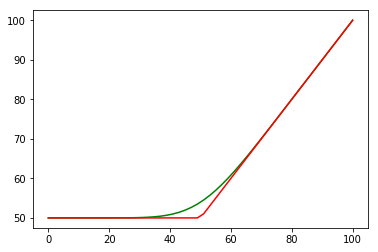

In [78]:
import matplotlib.pyplot as plt
plt.plot(x,y, "g")
plt.plot(x,y_real, "r")

plt.show()

In [70]:
y - y_real

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.76774176e-12,   3.36198980e-09,   8.82294238e-07,
         8.78309819e-05,   3.41837384e-03,   5.46428771e-02,
         3.89333026e-01,   3.89333026e-01,   5.46428771e-02,
         3.41837384e-03,   8.78309819e-05,   8.82294231e-07,
         3.36198980e-09,   4.76774176e-12,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,